# Task-04: Visualization & Analysis of Road Accidents

Dataset: Accident.csv

Importing Necessary Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [26]:
df = pd.read_csv("Accident.csv")

Checking dataset overall

In [27]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

print("\n Missing Values per column: ")
print(df.isnull().sum())

print("\n Total Duplicate Rows:", df.duplicated().sum()) 

df.dtypes

Total Rows: 12316
Total Columns: 15

 Missing Values per column: 
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

 Total Duplicate Rows: 390


Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Lanes_or_Medians           object
Types_of_Junction          object
Road_surface_type          object
Light_conditions           object
Weather_conditions         object
Type_of_collision          object
Vehicle_movement           object
Pedestrian_movement        object
Cause_of_accident          object
Accident_severity           int64
dtype: object

Removing Duplicate rows

In [28]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

# Verifying duplicates removed
df.duplicated().sum()

np.int64(0)

In [29]:
df.shape

(11926, 15)

The dataset is Cleaned ! Ready For Visualization & Analysis 

# Visualization & Analysis of Road Accident

1.  📊 UNIVARIATE, BIVARIATE & MULTIVARIATE ANALYSIS

C:\Users\sumai\AppData\Local\Temp\ipykernel_26632\817192405.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_severity', data=df, palette='Set2')


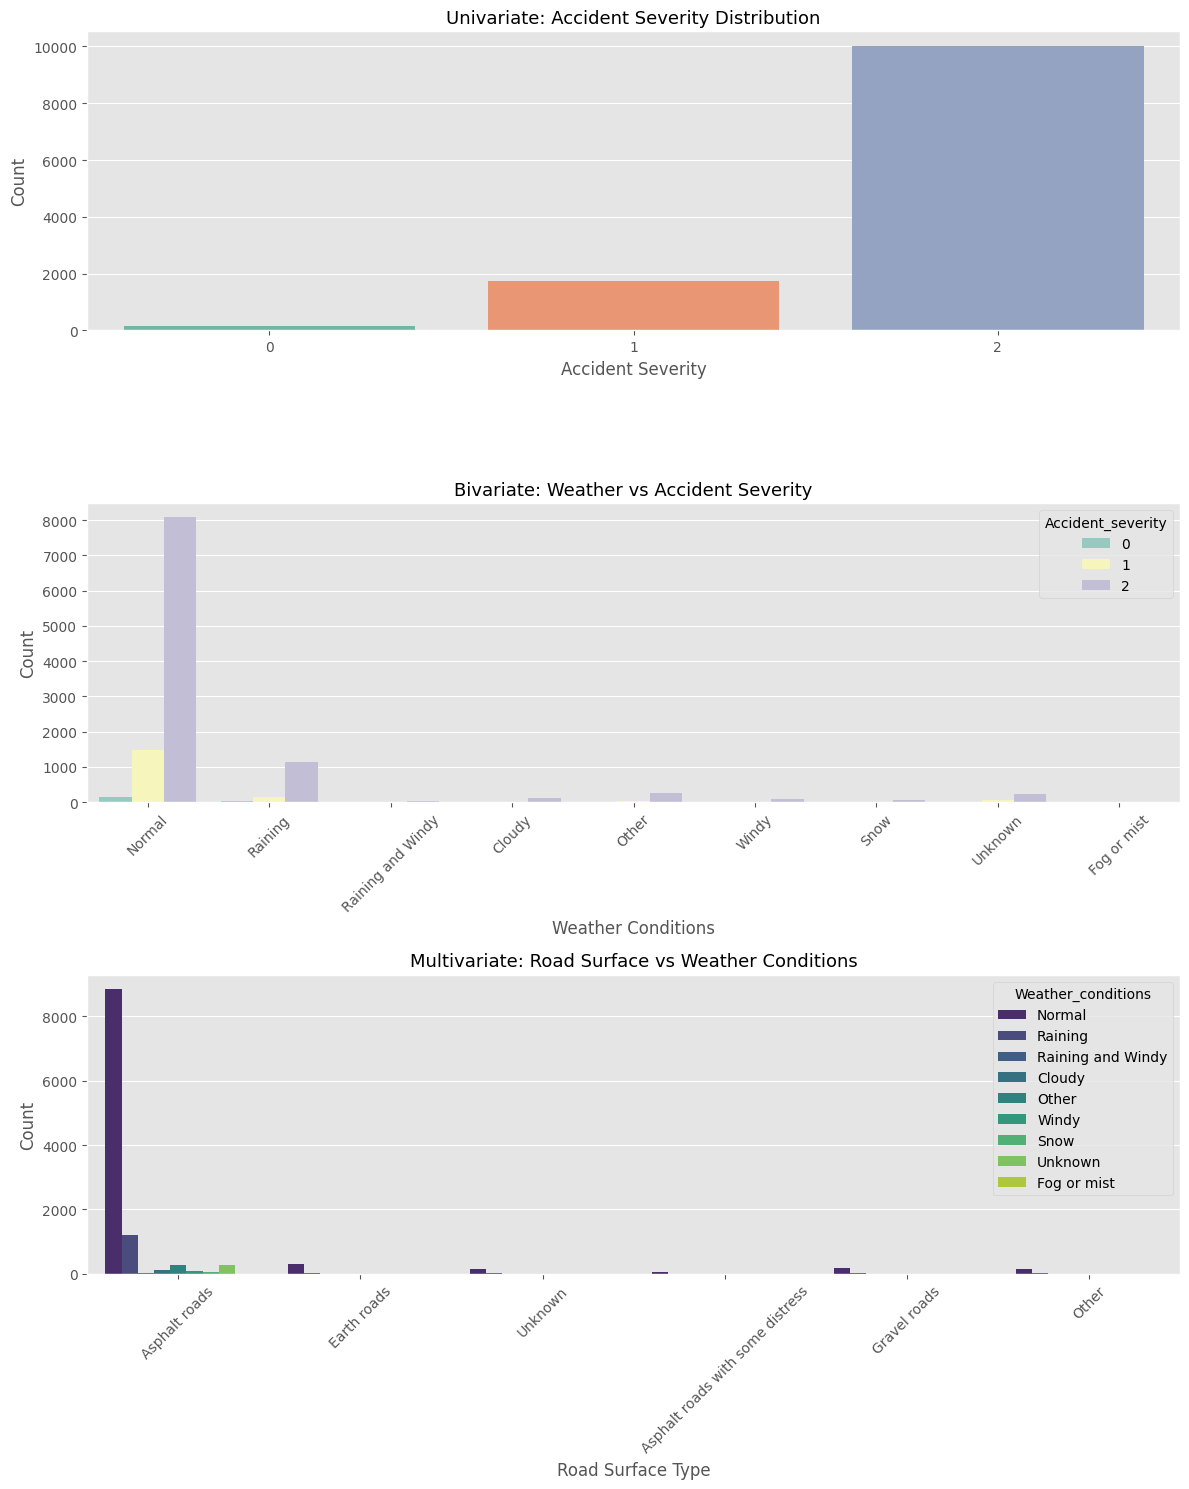

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(12,15))  

# ---------------- UNIVARIATE ANALYSIS ----------------
plt.subplot(3,1,1)
sns.countplot(x='Accident_severity', data=df, palette='Set2')
plt.title('Univariate: Accident Severity Distribution', fontsize=13)
plt.xlabel('Accident Severity')
plt.ylabel('Count')

# ---------------- BIVARIATE ANALYSIS ----------------
plt.subplot(3,1,2)
sns.countplot(x='Weather_conditions', hue='Accident_severity', data=df, palette='Set3')
plt.title('Bivariate: Weather vs Accident Severity', fontsize=13)
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)

# ---------------- MULTIVARIATE ANALYSIS ----------------
plt.subplot(3,1,3)
sns.countplot(x='Road_surface_type', hue='Weather_conditions', data=df, palette='viridis')
plt.title('Multivariate: Road Surface vs Weather Conditions', fontsize=13)
plt.xlabel('Road Surface Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Explanation:

Univariate: Shows the overall distribution of Accident_severity.

Bivariate: Compares how accident severity varies under different Weather_conditions.

Multivariate: Displays how Road_surface_type interacts with Weather_conditions, revealing combined effects on accident frequency.

2. Identifying Key Patterns and Insights

In [31]:
df['Weather_conditions'].value_counts()
df['Cause_of_accident'].value_counts()
df.groupby('Weather_conditions')['Accident_severity'].mean()

Weather_conditions
Cloudy               1.936000
Fog or mist          1.900000
Normal               1.820473
Other                1.905405
Raining              1.845805
Raining and Windy    1.950000
Snow                 1.918033
Unknown              1.825342
Windy                1.836735
Name: Accident_severity, dtype: float64

C:\Users\sumai\AppData\Local\Temp\ipykernel_26632\110685438.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Weather_conditions', data=df, order=df['Weather_conditions'].value_counts().index,


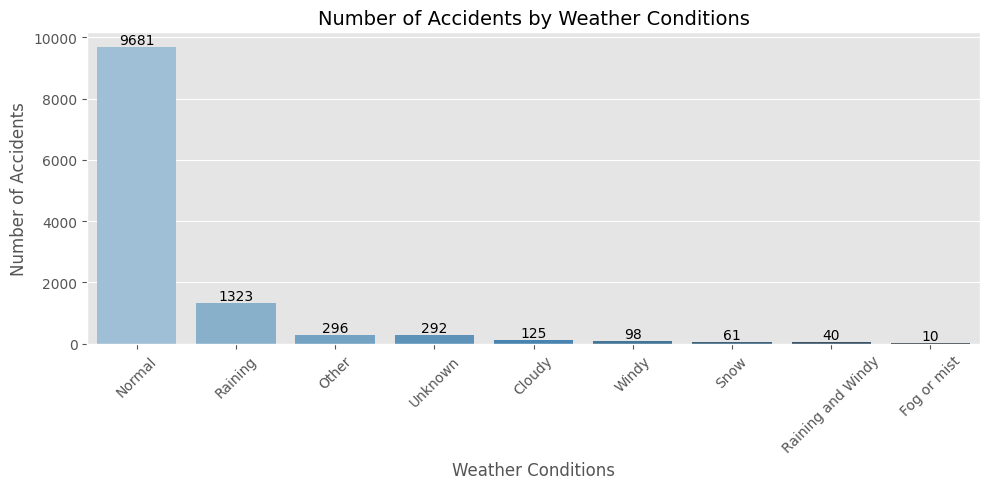

C:\Users\sumai\AppData\Local\Temp\ipykernel_26632\110685438.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_severity.index, y=avg_severity.values, palette='Reds_r')


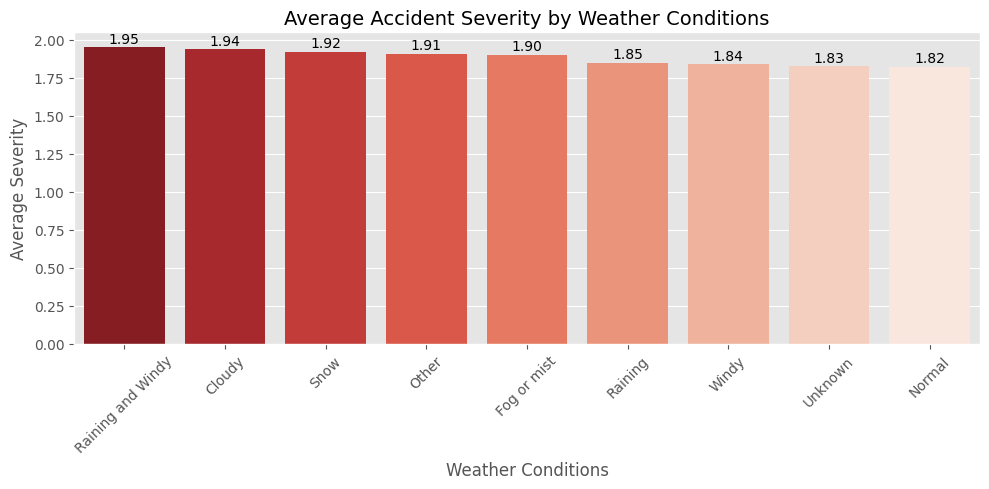

In [32]:
plt.style.use('ggplot')

# Mapping numeric severity to labels
severity_map = {0: 'Minor', 1: 'Serious', 2: 'Fatal'}
df['Accident_severity_label'] = df['Accident_severity'].map(severity_map)

# ---------------- 1. Weather Conditions Count ----------------
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Weather_conditions', data=df, order=df['Weather_conditions'].value_counts().index,
                   palette='Blues_d')
plt.title('Number of Accidents by Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ---------------- 2. Average Accident Severity by Weather ----------------
plt.figure(figsize=(10,5))
avg_severity = df.groupby('Weather_conditions')['Accident_severity'].mean().sort_values(ascending=False)
ax = sns.barplot(x=avg_severity.index, y=avg_severity.values, palette='Reds_r')
plt.title('Average Accident Severity by Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(avg_severity.values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Insights:

Severity increases under rain + wind, snow, and fog, showing poor visibility and traction are key risk amplifiers.

Normal or unknown weather corresponds to the lowest average severity, confirming the impact of environmental conditions.

Even during Cloudy weather, severity remains high — suggesting drivers underestimate risks when roads are wet but not obviously dangerous.

Accident Hotspot Visualization

C:\Users\sumai\AppData\Local\Temp\ipykernel_26632\875886826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Cause_of_accident', data=df,


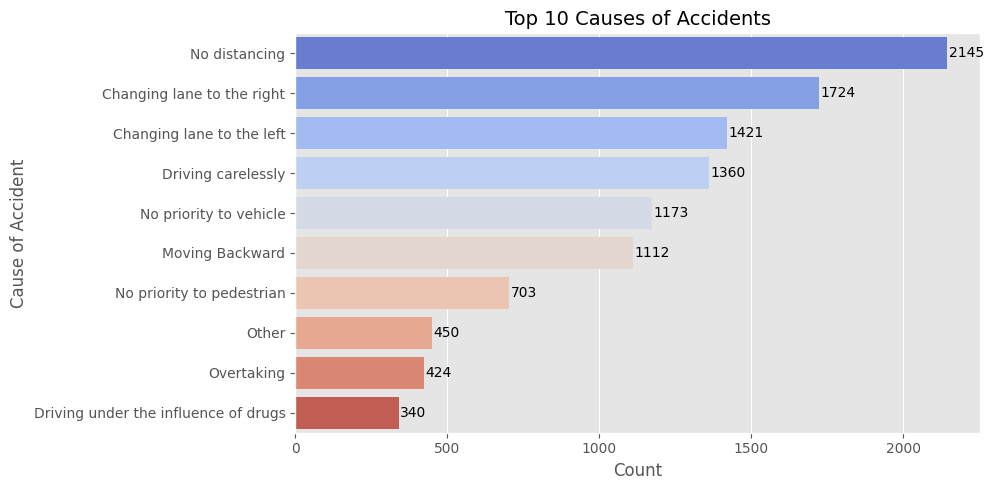

C:\Users\sumai\AppData\Local\Temp\ipykernel_26632\875886826.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Types_of_Junction', data=df,


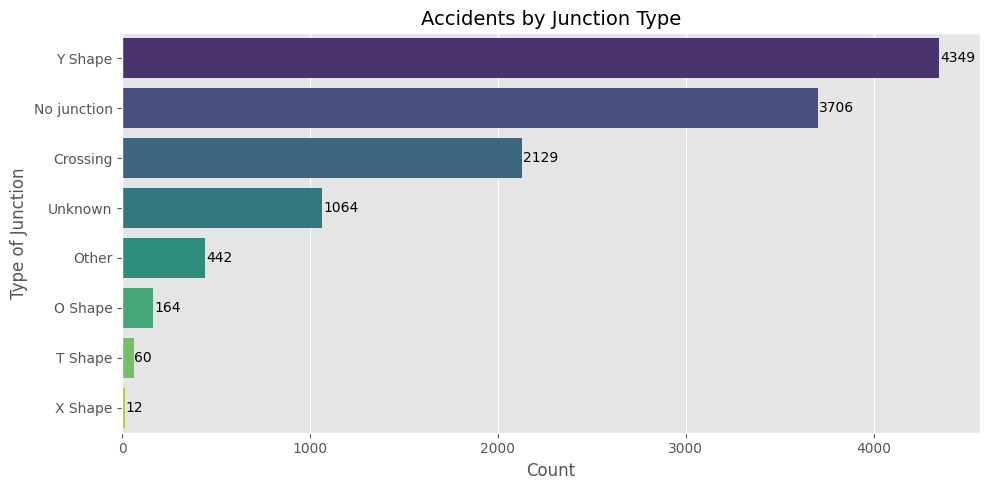

In [33]:
plt.style.use('ggplot')

# ---------------- 1. Top 10 Causes of Accidents ----------------
plt.figure(figsize=(10,5))
ax = sns.countplot(y='Cause_of_accident', data=df, 
                   order=df['Cause_of_accident'].value_counts().index[:10], 
                   palette='coolwarm')
plt.title('Top 10 Causes of Accidents', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Cause of Accident')

# Adding value labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', 
                (width + 5, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ---------------- 2. Accidents by Junction Type ----------------
plt.figure(figsize=(10,5))
ax = sns.countplot(y='Types_of_Junction', data=df, 
                   order=df['Types_of_Junction'].value_counts().index, 
                   palette='viridis')
plt.title('Accidents by Junction Type', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Type of Junction')

# Adding value labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', 
                (width + 5, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Interpretation:

Top 10 Causes of Accidents: Identified the most frequent accident causes using a bar chart.

Accidents by Junction Type: Visualized accident frequency by road junction type to identify high-risk junctions.

Scatter Plot for Logical Accident Hotspots

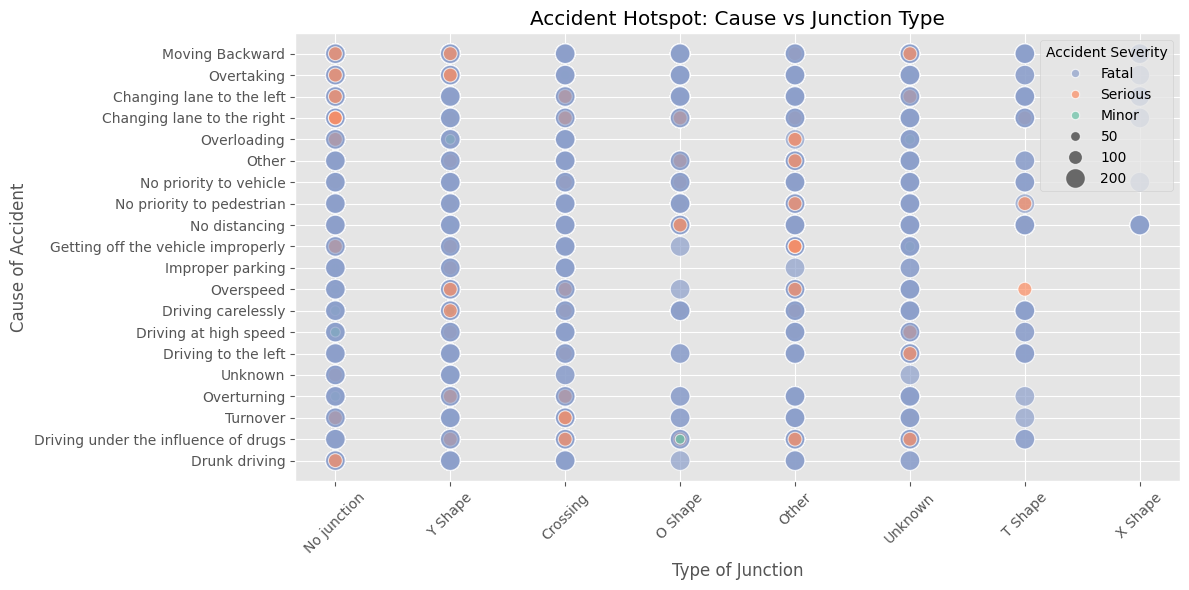

In [34]:
plt.figure(figsize=(12,6))

# Mapping severity to numeric for size of points
severity_map = {0: 'Minor', 1: 'Serious', 2: 'Fatal'}
df['Accident_severity_label'] = df['Accident_severity'].map(severity_map)
severity_size = {'Minor':50, 'Serious':100, 'Fatal':200}  # bubble size

# Scatter plot
sns.scatterplot(
    x='Types_of_Junction',
    y='Cause_of_accident',
    size=df['Accident_severity_label'].map(severity_size),
    hue='Accident_severity_label',
    data=df,
    palette={'Minor':'#66c2a5','Serious':'#fc8d62','Fatal':'#8da0cb'},
    alpha=0.7,
    sizes=(50, 200)
)

plt.xticks(rotation=45)
plt.title('Accident Hotspot: Cause vs Junction Type')
plt.xlabel('Type of Junction')
plt.ylabel('Cause of Accident')
plt.legend(title='Accident Severity', loc='upper right')
plt.tight_layout()
plt.show()

What This Shows:

X-axis: Junction type (where accidents occurred)

Y-axis: Cause of accident

Bubble size: Severity (bigger = more severe)

Color: Accident severity (Minor, Serious, Fatal)

Insight: Now it can be identified “hotspot clusters” where severe accidents occur at specific junction types for certain causes.

3. Insights & Recommendations

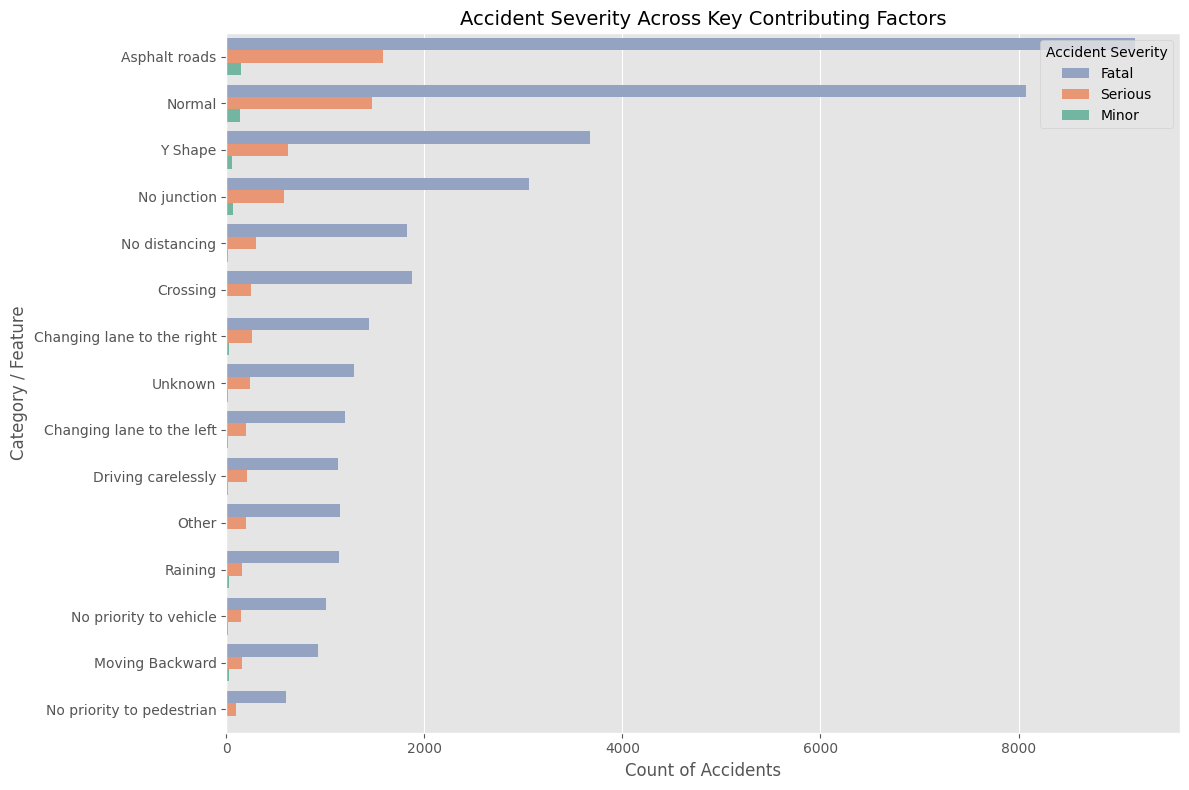

In [35]:
plt.figure(figsize=(12,8))

# Mapping numeric severity to labels
severity_map = {0: 'Minor', 1: 'Serious', 2: 'Fatal'}
df['Accident_severity_label'] = df['Accident_severity'].map(severity_map)

# Combining multiple categorical features for one chart
df_subset = df[['Weather_conditions', 'Road_surface_type', 'Types_of_Junction', 'Cause_of_accident', 'Accident_severity_label']]

# Melting dataframe for plotting
df_melt = df_subset.melt(id_vars='Accident_severity_label', 
                         value_vars=['Weather_conditions', 'Road_surface_type', 'Types_of_Junction', 'Cause_of_accident'],
                         var_name='Feature', value_name='Category')

# Defining custom color palette
palette_colors = {'Minor':'#66c2a5', 'Serious':'#fc8d62', 'Fatal':'#8da0cb'}

# Plotting
sns.countplot(y='Category', hue='Accident_severity_label', data=df_melt,
              palette=palette_colors, order=df_melt['Category'].value_counts().index[:15])

plt.title('Accident Severity Across Key Contributing Factors', fontsize=14)
plt.xlabel('Count of Accidents')
plt.ylabel('Category / Feature')

# Legend in the upper right corner
plt.legend(title='Accident Severity', loc='upper right')

plt.tight_layout()
plt.show()

This Chart Shows:

Y-axis: Top 15 categories from all key factors combined (Weather, Road Surface, Junction, Cause).

X-axis: Number of accidents.

Hue: Accident severity (e.g., Minor, Serious, Fatal).

Insight: now it can be visually identified which factors contribute most to severe accidents, all in one chart.

# Overview of Traffic Accident Patterns, Severity, and Contributing Factors

C:\Users\sumai\AppData\Local\Temp\ipykernel_26632\2452328282.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_severity', data=df, palette='Set2', ax=axes[0,0])
C:\Users\sumai\AppData\Local\Temp\ipykernel_26632\2452328282.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cause_of_accident', data=df, order=df['Cause_of_accident'].value_counts().index[:10],
C:\Users\sumai\AppData\Local\Temp\ipykernel_26632\2452328282.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Types_of_Junction', data=df, order=df['Types_

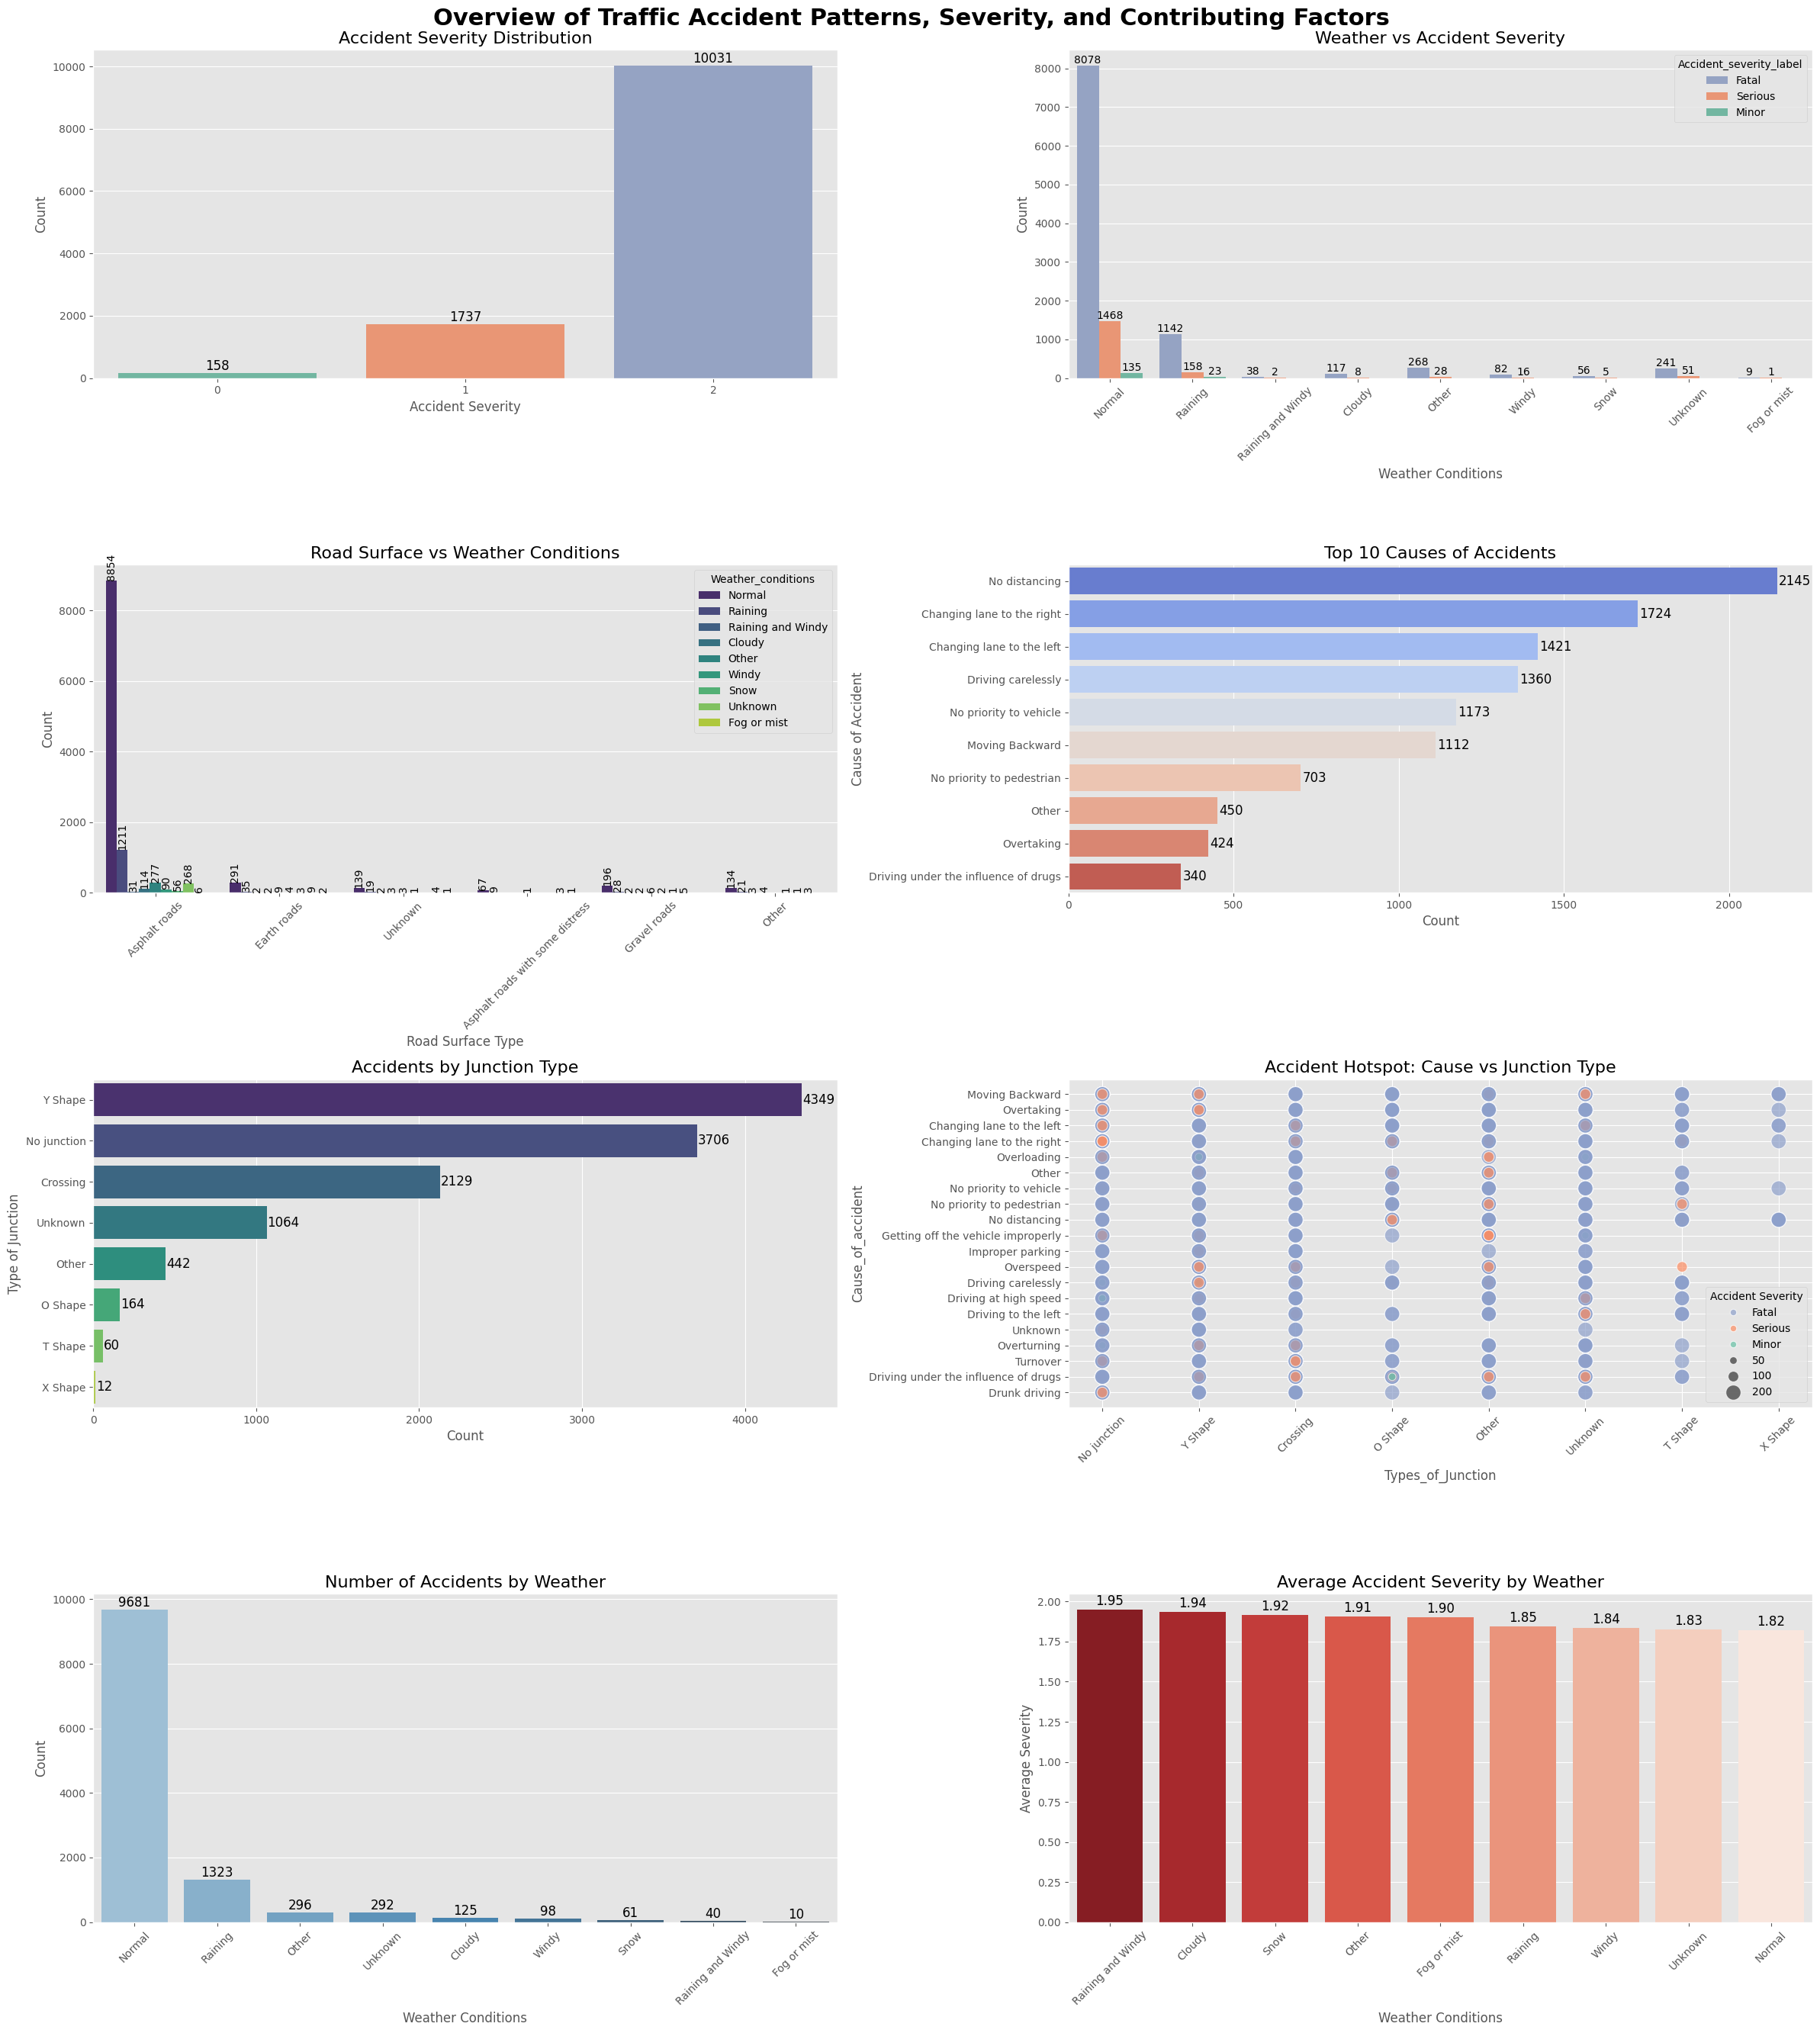

In [36]:
plt.style.use('ggplot')

# Mapping numeric severity to labels
severity_map = {0: 'Minor', 1: 'Serious', 2: 'Fatal'}
df['Accident_severity_label'] = df['Accident_severity'].map(severity_map)
severity_size = {'Minor':50, 'Serious':100, 'Fatal':200}

# Setting up figure with multiple rows, 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(24,28))  # 4 rows × 2 columns
fig.suptitle('Overview of Traffic Accident Patterns, Severity, and Contributing Factors', fontsize=22, fontweight='bold', y=0.95)

# ---------------- Row 1 ----------------
# Chart 1: Univariate Accident Severity
sns.countplot(x='Accident_severity', data=df, palette='Set2', ax=axes[0,0])
axes[0,0].set_title('Accident Severity Distribution', fontsize=16)
axes[0,0].set_xlabel('Accident Severity')
axes[0,0].set_ylabel('Count')
for p in axes[0,0].patches:
    axes[0,0].annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=12)

# Chart 2: Weather vs Accident Severity with values
sns.countplot(x='Weather_conditions', hue='Accident_severity_label', data=df,
              palette={'Minor':'#66c2a5','Serious':'#fc8d62','Fatal':'#8da0cb'}, ax=axes[0,1])
axes[0,1].set_title('Weather vs Accident Severity', fontsize=16)
axes[0,1].set_xlabel('Weather Conditions')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)
# Annotate values for each hue
for p in axes[0,1].patches:
    height = p.get_height()
    if height > 0:
        axes[0,1].annotate(int(height), (p.get_x() + p.get_width()/2, height), ha='center', va='bottom', fontsize=10)

# ---------------- Row 2 ----------------
# Chart 3: Road Surface vs Weather with clear values
sns.countplot(x='Road_surface_type', hue='Weather_conditions', data=df, palette='viridis', ax=axes[1,0])
axes[1,0].set_title('Road Surface vs Weather Conditions', fontsize=16)
axes[1,0].set_xlabel('Road Surface Type')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# Annotate values on each bar clearly
for p in axes[1,0].patches:
    height = p.get_height()
    if height > 0:
        axes[1,0].annotate(int(height), 
                           (p.get_x() + p.get_width()/2, height), 
                           ha='center', va='bottom', fontsize=10, rotation=90)

# Chart 4: Top 10 Causes of Accidents
sns.countplot(y='Cause_of_accident', data=df, order=df['Cause_of_accident'].value_counts().index[:10],
              palette='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Top 10 Causes of Accidents', fontsize=16)
axes[1,1].set_xlabel('Count')
axes[1,1].set_ylabel('Cause of Accident')
for p in axes[1,1].patches:
    axes[1,1].annotate(int(p.get_width()), (p.get_width()+5, p.get_y()+p.get_height()/2), ha='left', va='center', fontsize=12)

# ---------------- Row 3 ----------------
# Chart 5: Accidents by Junction Type
sns.countplot(y='Types_of_Junction', data=df, order=df['Types_of_Junction'].value_counts().index,
              palette='viridis', ax=axes[2,0])
axes[2,0].set_title('Accidents by Junction Type', fontsize=16)
axes[2,0].set_xlabel('Count')
axes[2,0].set_ylabel('Type of Junction')
for p in axes[2,0].patches:
    axes[2,0].annotate(int(p.get_width()), (p.get_width()+5, p.get_y()+p.get_height()/2), ha='left', va='center', fontsize=12)

# Chart 6: Accident Hotspot Scatter (Junction vs Cause)
sns.scatterplot(x='Types_of_Junction', y='Cause_of_accident', size=df['Accident_severity_label'].map(severity_size),
                hue='Accident_severity_label', data=df, palette={'Minor':'#66c2a5','Serious':'#fc8d62','Fatal':'#8da0cb'},
                alpha=0.7, sizes=(50,200), ax=axes[2,1])
axes[2,1].set_title('Accident Hotspot: Cause vs Junction Type', fontsize=16)
axes[2,1].tick_params(axis='x', rotation=45)
axes[2,1].legend(title='Accident Severity', loc='lower right')

# ---------------- Row 4 ----------------
# Chart 7: Number of Accidents by Weather
sns.countplot(x='Weather_conditions', data=df, order=df['Weather_conditions'].value_counts().index,
              palette='Blues_d', ax=axes[3,0])
axes[3,0].set_title('Number of Accidents by Weather', fontsize=16)
axes[3,0].set_xlabel('Weather Conditions')
axes[3,0].set_ylabel('Count')
axes[3,0].tick_params(axis='x', rotation=45)
for p in axes[3,0].patches:
    axes[3,0].annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=12)

# Chart 8: Average Accident Severity by Weather
avg_severity = df.groupby('Weather_conditions')['Accident_severity'].mean().sort_values(ascending=False)
sns.barplot(x=avg_severity.index, y=avg_severity.values, palette='Reds_r', ax=axes[3,1])
axes[3,1].set_title('Average Accident Severity by Weather', fontsize=16)
axes[3,1].set_xlabel('Weather Conditions')
axes[3,1].set_ylabel('Average Severity')
axes[3,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(avg_severity.values):
    axes[3,1].text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Conclusion: 

The analysis of traffic accident data has revealed significant patterns and contributing factors affecting accident severity. Weather conditions, road surface type, and junction type were found to influence accident occurrence and severity. The most common causes of accidents were identified, and accident hotspots were visualized, highlighting areas that require greater attention for traffic safety. The visualizations indicate that certain weather conditions, such as rain or fog, and specific road surfaces are associated with higher severity accidents. Overall, these insights can help authorities and policymakers implement targeted measures to improve road safety and reduce accidents.


# Task-04 Completed Successfully !